In [1]:
import numpy as np
import pickle
import tqdm
from scipy import stats

In [2]:
with open('../data/q_val_data_11_to_15.pkl', 'rb') as f:
    _, results, results1 = pickle.load(f)

In [3]:
for i in range(len(results)):
    results[i].update(results1[i])

data = {item['division']:item for item in results if item is not None}

del results, results1

In [4]:
for dat in tqdm.tqdm(data):
    temp1 = data[dat]['q_user_0'] #== data[dat]['q_max_user_0']
    temp2 = data[dat]['q_user_1'] #== data[dat]['q_max_user_1']
    # temp1 = (data[dat]['q_user_0'] - data[dat]['q_min_user_0']) / (data[dat]['q_max_user_0'] - data[dat]['q_min_user_0'])
    # temp2 = (data[dat]['q_user_1'] - data[dat]['q_min_user_1']) / (data[dat]['q_max_user_1'] - data[dat]['q_min_user_1'])
    # temp1 = temp1.astype('int32')
    # temp2 = temp2.astype('int32')
    if len(temp1) >= 25 and len(temp2) >= 25:
        if len(temp1) != len(temp2):
            length = np.min([len(temp1), len(temp2)])
            temp1 = temp1[:length]
            temp2 = temp2[:length]
        data[dat]['delta_q_0'] = np.mean(temp1 - temp2)
        data[dat]['delta_q_1'] = np.mean(temp2 - temp1)

100%|██████████| 916750/916750 [00:29<00:00, 30810.25it/s]


In [5]:
win = []
score = []
for dat in tqdm.tqdm(data):
    if 'delta_q_1' in data[dat]:
        score.append(data[dat]['delta_q_0'])
        win.append(int(data[dat]['score'][0] > data[dat]['score'][1]))
        score.append(data[dat]['delta_q_1'])
        win.append(int(data[dat]['score'][1] > data[dat]['score'][0]))

100%|██████████| 916750/916750 [00:02<00:00, 314643.34it/s]


In [6]:
win = np.array(win)
score = np.array(score)

idx = np.logical_and(score < np.percentile(score, 90), score > np.percentile(score, 10))
score1 = score[idx]
win1 = win[idx]

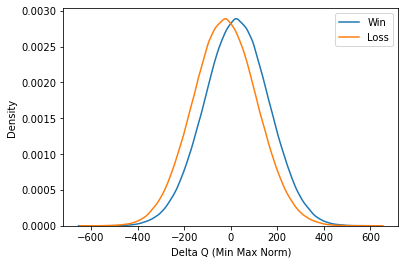

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(score[win==1], label='Win')
sns.kdeplot(score[win==0], label='Loss')
plt.xlabel('Delta Q (Min Max Norm)')
plt.legend()

In [8]:
with open('../data/delta_q_11_to_15.pkl', 'wb') as f:
    pickle.dump(data, f)

In [9]:
len(win)

1781740